In [1]:
#Import Pytorch
import torch
from torch import nn

In [2]:
# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [3]:
# Import other important libs
import matplotlib.pyplot as plt
import os
import shutil
from tqdm import tqdm

In [4]:
# Define Image Transformation
transform =  transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [5]:
data_center = r"X:\Datasets\Food101"

In [6]:
dataset = datasets.Food101(
    root=data_center,
    download=True,
    transform=transform
)

100%|█████████████████████████████████████████████████████████████████████████████| 5.00G/5.00G [38:41<00:00, 2.15MB/s]


Extracting X:\Datasets\Food101\food-101.tar.gz to X:\Datasets\Food101


In [6]:
dataset = datasets.Food101(
    root=data_center,
    download=True,
    transform=transform
)

In [7]:
# Define dataset directories
train_dir = os.path.join(data_center, "train")
test_dir = os.path.join(data_center, "test")

# Ensure dir existence
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [8]:
def print_directory_tree(start_dir, max_depth=None, current_level=0):
    if max_depth is not None and current_level >= max_depth:
        return  # Stop if the current depth exceeds the max depth limit
    
    for root, dirs, files in os.walk(start_dir):
        level = root.replace(start_dir, "").count(os.sep)
        if max_depth is not None and level >= max_depth:
            continue  # Skip directories deeper than the max depth

        indent_level = "│   " * level
        folder_name = os.path.basename(root)

        # Count subfolders
        folder_count = len(dirs)

        # Filter out image files
        image_count = sum(1 for file in files if file.lower().endswith(('.jpg', '.png')))
        other_files = [file for file in files if not file.lower().endswith(('.jpg', '.png'))]

        # Print folder name with subfolder count
        print(f"{indent_level}📁 {folder_name}/ [Subfolders: {folder_count}]")

        # Show image count if applicable
        if image_count > 0:
            print(f"{indent_level}│---> 📄 [Total images: {image_count}]")

        # Print other files
        for file in other_files:
            print(f"{indent_level}│---> 📄 {file}")

In [9]:
# Set your start directory and depth limit
start_directory = data_center
print_directory_tree(start_directory, max_depth=3)

📁 Food101/ [Subfolders: 3]
│---> 📄 food-101.tar.gz
│   📁 food-101/ [Subfolders: 2]
│   │---> 📄 license_agreement.txt
│   │---> 📄 README.txt
│   │   📁 images/ [Subfolders: 101]
│   │   📁 meta/ [Subfolders: 0]
│   │   │---> 📄 classes.txt
│   │   │---> 📄 labels.txt
│   │   │---> 📄 test.json
│   │   │---> 📄 test.txt
│   │   │---> 📄 train.json
│   │   │---> 📄 train.txt
│   📁 test/ [Subfolders: 0]
│   📁 train/ [Subfolders: 0]


In [10]:
print(f"Length of Food101 Dataset\t: {len(dataset)}")

Length of Food101 Dataset	: 75750


In [11]:
# Define paths
base_dir = os.path.join(data_center, "food-101")
image_dir = os.path.join(base_dir, "images")
train_txt = os.path.join(base_dir, "meta", "train.txt")
test_txt = os.path.join(base_dir, "meta", "test.txt")
class_names_txt = os.path.join(base_dir, "meta", "classes.txt")
labels_txt = os.path.join(base_dir, "meta", "labels.txt")

In [12]:
# Function to read lines from txt file
def read_split_file(split_file):
    with open(split_file, "r") as f:
        return [line.strip() for line in f.readlines()]

In [13]:
# Get image relative paths from meta
train_images = read_split_file(train_txt)
test_images = read_split_file(test_txt)
class_names = read_split_file(class_names_txt)
labels = read_split_file(labels_txt)

In [14]:
print(f"Length of Train Images\t: {len(train_images)}")
print(f"Length of Test Images\t: {len(test_images)}")
print(f"Length Class Names\t: {len(class_names)}")
print(f"Length of Labels\t: {len(labels)}")

Length of Train Images	: 75750
Length of Test Images	: 25250
Length Class Names	: 101
Length of Labels	: 101


In [15]:
# Ensure class subfolders exist
def make_class_dirs(target_base, class_names):
    for class_name in class_names:
        os.makedirs(os.path.join(target_base, class_name), exist_ok=True)

make_class_dirs(train_dir, class_names)
make_class_dirs(test_dir, class_names)

In [16]:
print_directory_tree(data_center, max_depth=2)

📁 Food101/ [Subfolders: 3]
│---> 📄 food-101.tar.gz
│   📁 food-101/ [Subfolders: 2]
│   │---> 📄 license_agreement.txt
│   │---> 📄 README.txt
│   📁 test/ [Subfolders: 101]
│   📁 train/ [Subfolders: 101]


In [17]:
# Function to copy images with tqdm progress bar
def copy_split_images(image_list, split_type):
    print(f"Copying {split_type} images...")
    for rel_path in tqdm(image_list, desc=f"{split_type.capitalize()} Set", unit="img"):
        class_name = rel_path.split('/')[0]
        filename = os.path.basename(rel_path) + ".jpg"  # Ensure .jpg extension
        src_path = os.path.join(image_dir, rel_path + ".jpg")

        # Determine destination directory
        dest_base_dir = train_dir if split_type == "train" else test_dir
        dest_dir = os.path.join(dest_base_dir, class_name)
        dest_path = os.path.join(dest_dir, filename)

        # Create class folder if it doesn't exist
        os.makedirs(dest_dir, exist_ok=True)

        # Skip if already copied
        if not os.path.exists(dest_path):
            shutil.copy2(src_path, dest_path)

In [18]:
# Copy train and test images
copy_split_images(train_images, split_type="train")
copy_split_images(test_images, split_type="test")

Copying train images...


Train Set: 100%|█████████████████████████████████████████████████████████████| 75750/75750 [00:05<00:00, 13065.97img/s]


Copying test images...


Test Set: 100%|██████████████████████████████████████████████████████████████| 25250/25250 [00:01<00:00, 13321.03img/s]


In [19]:
# Define paths to your train and test folders
train_dir = os.path.join(data_center, "train")
test_dir = os.path.join(data_center, "test")

# Collect all image file paths with progress bar
def get_all_image_paths(directory):
    all_paths = []
    for root, _, files in tqdm(list(os.walk(directory)), desc=f"Scanning {os.path.basename(directory)}\t"):
        for f in files:
            if f.lower().endswith(('.jpg', '.jpeg', '.png')):
                rel_path = os.path.relpath(os.path.join(root, f), directory)
                all_paths.append(rel_path)
    return set(all_paths)

# Get sets of relative image paths
train_images = get_all_image_paths(train_dir)
test_images = get_all_image_paths(test_dir)

# Check intersection
common_images = train_images.intersection(test_images)

# Report
if common_images:
    print(f"\n⚠️ {len(common_images)} duplicate image(s) found in both train and test sets:")
    for img in list(common_images)[:10]:  # show only first 10 duplicates
        print(f" - {img}")
else:
    print("\n✅ No duplicate images found between train and test sets.")

Scanning test	: 100%|███████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 208.16it/s]


✅ No duplicate images found between train and test sets.


In [20]:
print(f"Class Names:\n{class_names}\n\nNumber of Classes:\t{len(class_names)}")

Class Names:
['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macaron

In [21]:
# Load the datasets from folders
train_data = datasets.ImageFolder(
    root=train_dir, 
    transform=transform
)
test_data = datasets.ImageFolder(
    root=test_dir, 
    transform=transform
)

# Create DataLoaders
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

In [22]:
# For later use
random_idx = torch.randint(0, len(train_data), size=[1]).item()
img, label = train_data[random_idx]

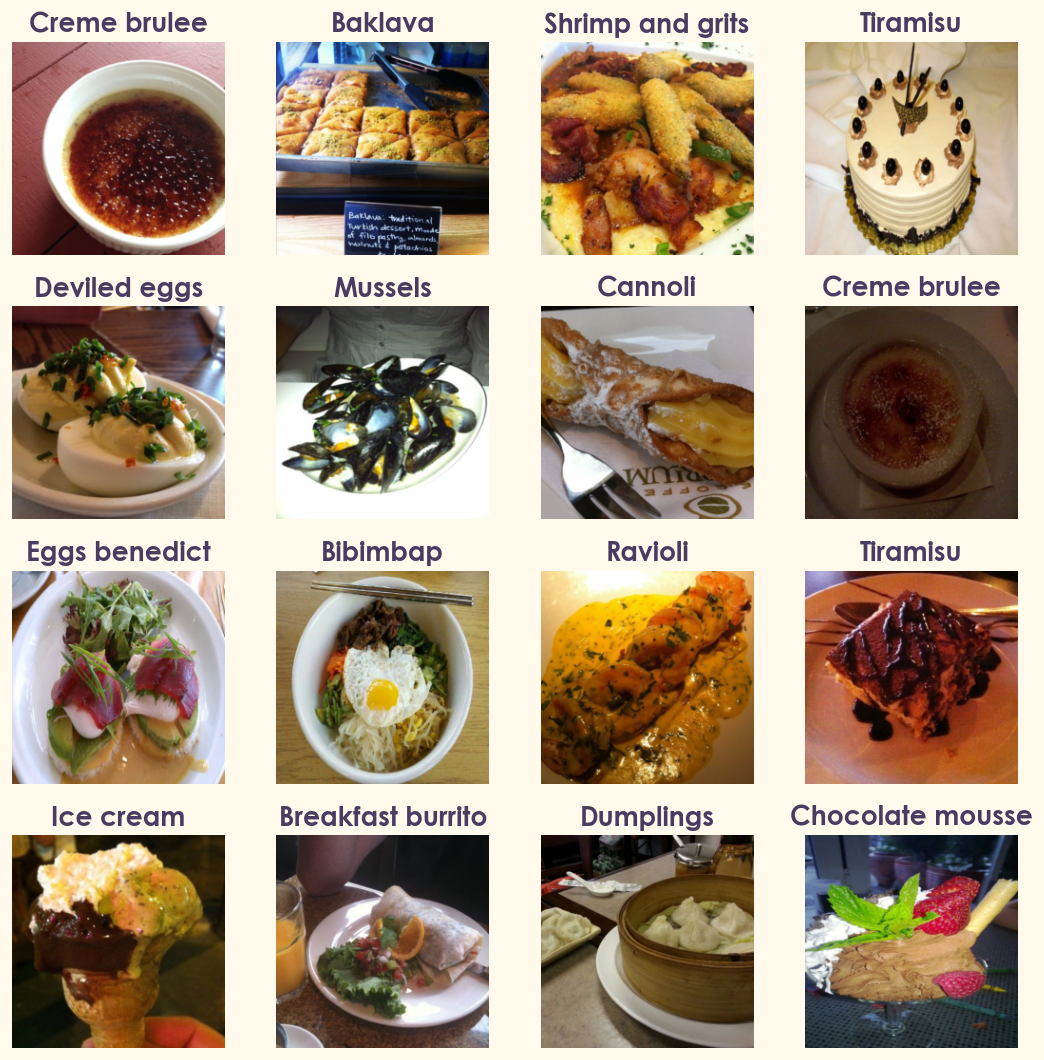

In [23]:
# Plotting settings
torch.manual_seed(123)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]  # img is a tensor
    img = img.permute(1, 2, 0)  # Convert from [C, H, W] to [H, W, C] for plotting
    img = img * 0.5 + 0.5  # Unnormalize if normalized with mean=[0.5], std=[0.5]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.numpy())
    plt.title(labels[label])
    plt.axis('off')

plt.tight_layout()
plt.show()